In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import igraph as ig

In [2]:
plt.style.use(['science','notebook','grid'])

In [3]:
N = 1000
p = 0.2

M = int(N*(N-1)/2)
print("M is: {}".format(M))

K = int(p*M)
print("K is: {}".format(K))

M is: 499500
K is: 99900


In [4]:
kaverage = p*(N-1)
print("The c coefficient value is {}".format(kaverage))

The c coefficient value is 199.8


In [5]:
assert K < M , "K deve essere necessariamente minore di M"

### Let's write the edgelist of all possible links

In [6]:
Mlist = []

for i in range(N):
    for j in range (i+1,N):
        Mlist.append((i+1,j+1))

In [7]:
assert len(Mlist) == M, "La lunghezza della edgelist massima dovrebbe essere M!"

## Let's try model A

In [8]:
Klist = []

for i in range(K):
    x = random.randint(0,M-1)
    y = Mlist[x]
    Klist.append(y)

In [9]:
assert len(Klist) == K, "La lunghezza della edgelist selezionata dovrebbe essere K!"

In [10]:
def edges_to_adjacencylist(edges): # this piece of code converts the edgelist to an adjacency list
    dictx = {}
    for (x,y) in edges:
        if x not in dictx:
            dictx[x] = [y]
        elif y not in dictx[x]:
            dictx[x].append(y)
            
        if y not in dictx:
            dictx[y] = [x]
        elif x not in dictx[y]:
            dictx[y].append(x)
            
    return dictx
        

In [11]:
adjlist = edges_to_adjacencylist(Klist)

In [12]:
# here we add empty list for all nodes without connections
for i in range(N):
    if adjlist.get(i+1, -1) == (-1):
        adjlist[i+1] = []

In [13]:
assert len(adjlist) == N, "La lunghezza della lista adiacenza dovrebbe essere N!"

### Let's now calculate some theoretical quantities and their empyrical values.

In [14]:
kexp = p*(N-1)
kexpstd = (p*(1-p)*(N-1))**(1/2)
print("The average expected degree is: {}".format(kexp))
print("The standard deviation of the average expected degree is: {}".format(kexpstd))

The average expected degree is: 199.8
The standard deviation of the average expected degree is: 12.642784503423288


In [15]:
klist = []

for i in range(len(adjlist)):
    x = 0

    for j in range(len(adjlist[i+1])):
        x += 1
    klist.append(x)
    
karr = np.array(klist)

In [16]:
assert len(klist) == N, "La lunghezza della lista contenente tutti i degree dovrebbe essere N!"

In [17]:
k = np.mean(karr)
kstd = np.std(karr)
kmin = np.min(karr)
kmax = np.max(karr)
print("The average degree of our graph is: {}".format(k))
print("The standard deviation associated to the average degree is: {}".format(kstd))
print("The minimum degree is: {}".format(kmin))
print("The maximum degree is: {}".format(kmax))

The average degree of our graph is: 180.962
The standard deviation associated to the average degree is: 12.298477791987104
The minimum degree is: 147
The maximum degree is: 219


### Let's now plot the degree distribution

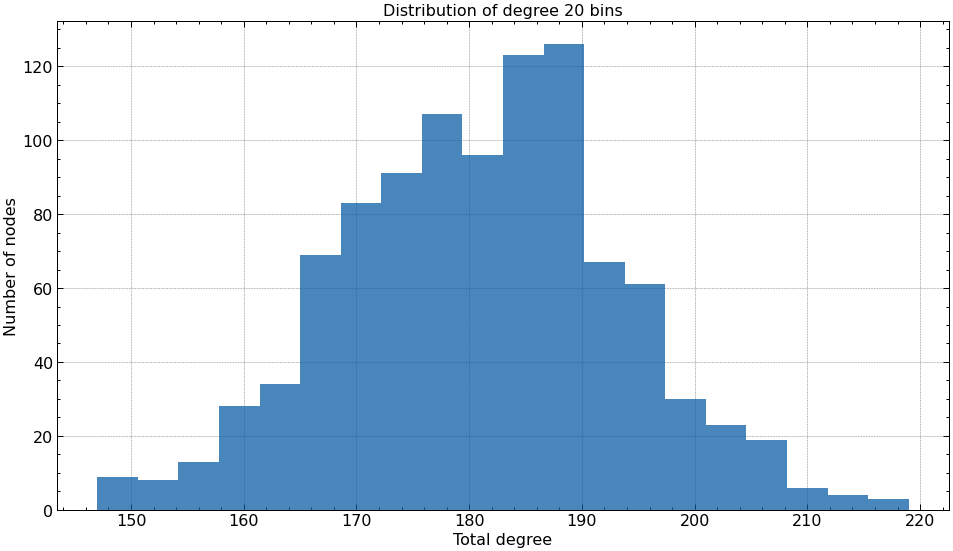

In [18]:
# Here I'll try to make a graph of the degree distribution
# We want the degree on the x, and the number of nodes with that degree on the y
# Or the histogram of the degree, we need x as the vector of the degree

x = karr
bins = 20
plt.figure(figsize=(16,9)) #must come BEFORE the actual plot
plt.hist(x, bins, alpha=0.75, density=False) #Alpha is the opacity, density is the normalization
plt.grid(True)
plt.locator_params(nbins=20) # this is about the density of thicks on both axis I could add <, axis='x'> inside the parentesis, to do just for one axis
plt.xlabel('Total degree')
plt.ylabel('Number of nodes')
plt.title('Distribution of degree ' + str(bins) + " bins")
plt.yscale('linear')
plt.xscale('linear')
plt.savefig('degree_distribution.png') #always save before plt.show() it should be "namefile.png" or "namefile.pdf"
plt.show()

In [19]:
x = karr
x.sort()
x = np.array(x)
y = np.arange(len(x)) / float(len(x))

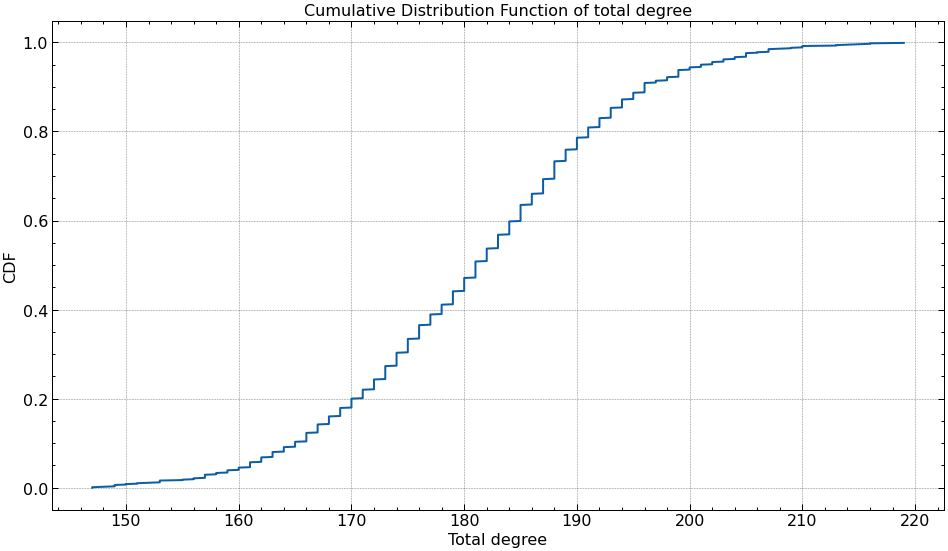

In [20]:
plt.figure(figsize=(16,9))
plt.plot(x, y) 
plt.grid(True)
plt.xlabel('Total degree')
plt.ylabel('CDF')
plt.title("Cumulative Distribution Function of total degree")
plt.yscale('linear')
plt.xscale('linear')
plt.savefig("CDF.png")
plt.show()

### Let's calculate the connected components

In [21]:
def bfs(graph, node): #function for BFS, graph is a dictionary of the adjacency list
    visited = [] # List for already visited nodes.
    queue = []         # Initialize a queue, this contains the nodes whose neighbours are yet to be visited
    connections = [] # This list, at the end, will contain all the nodes connected to the selected node
    
    visited.append(node)
    queue.append(node)

    while len(queue)>0:                    # Creating loop to visit each node
        m = queue.pop(0) 
        connections.append(m)

        for neighbour in graph[m]:
            if neighbour not in visited:
                visited.append(neighbour)
                queue.append(neighbour)
    
    return connections

In [22]:
connected1 = []
alreadyconnected = set()
connectedtemp = set()

for i in range(1,N+1): #TROVARE LE COMPONENTI CONNESSE
    
    if i in alreadyconnected:
        continue
    
    connectedtemp = set()
    connectedtemp.add(i)

    for j in bfs(adjlist,i):
        connectedtemp.add(j)
        alreadyconnected.add(j)
        
    connected1.append(connectedtemp)

In [23]:
print("Our graph has {} connected components".format(len(connected1)))

Our graph has 1 connected components


### Let's calculate assortativity manually

In [24]:
degreedict0 = {}

for key in adjlist:
    val = adjlist[key]
    degreedict0[key] = len(val)

In [25]:
degreedict1 = {}
default = -1
for key in adjlist:
    val = adjlist[key]
    degree = len(val)
    if degreedict1.get(degree,default) == -1: #if the key entry is not there, we set it
        degreedict1[degree] = [key]
    else:
        degreedict1[degree].append(key) #if the key entry is present, we append another airport

In [26]:
assortativity = {}


for key in degreedict1:
    val = degreedict1[key]
    Nk = len(val)
    sum1 = 0
    for airport in val:
        knn = 0
        for neigh in adjlist[airport]:         
            knn += degreedict0[neigh]
        knn /= degreedict0[airport]
        sum1 += knn
    assortativity[key] = sum1/Nk


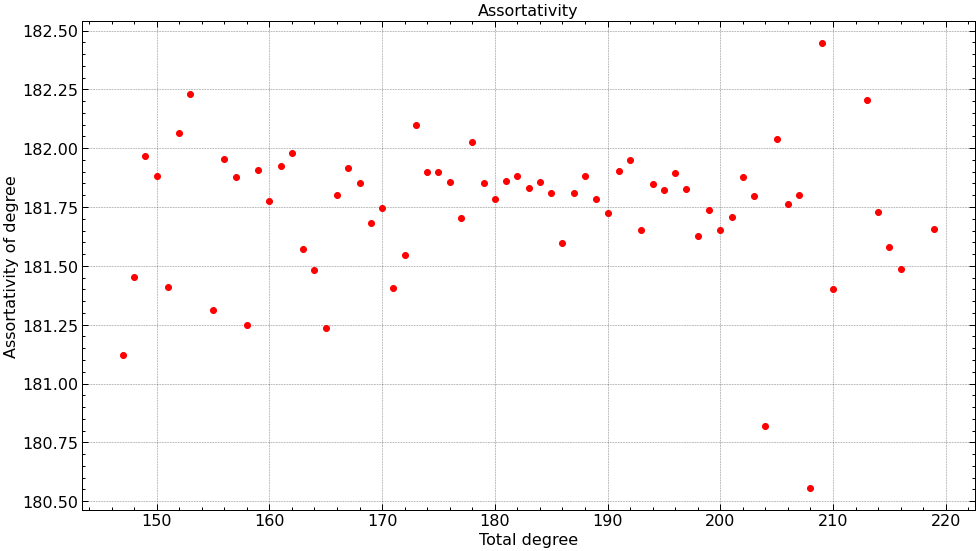

In [27]:
x = []
for key in assortativity:
    x.append(int(key))
x.sort()

y = []
for i in x:
    y.append(assortativity[i])

plt.figure(figsize=(16,9))
plt.plot(x, y, "ro") 
plt.grid(True)
plt.xlabel('Total degree')
plt.ylabel('Assortativity of degree')
plt.title("Assortativity")
plt.yscale('linear')
plt.xscale('linear')
plt.savefig("assortativity.png")
plt.show()

### Let's calculate the betweenness and other things with igraph

In [28]:
g = ig.Graph(N, Klist)
g["title"] = "ER"
g.vs["name"] = range(1,N+1)

In [29]:
bw = g.betweenness()
x = bw.pop(0)
del x

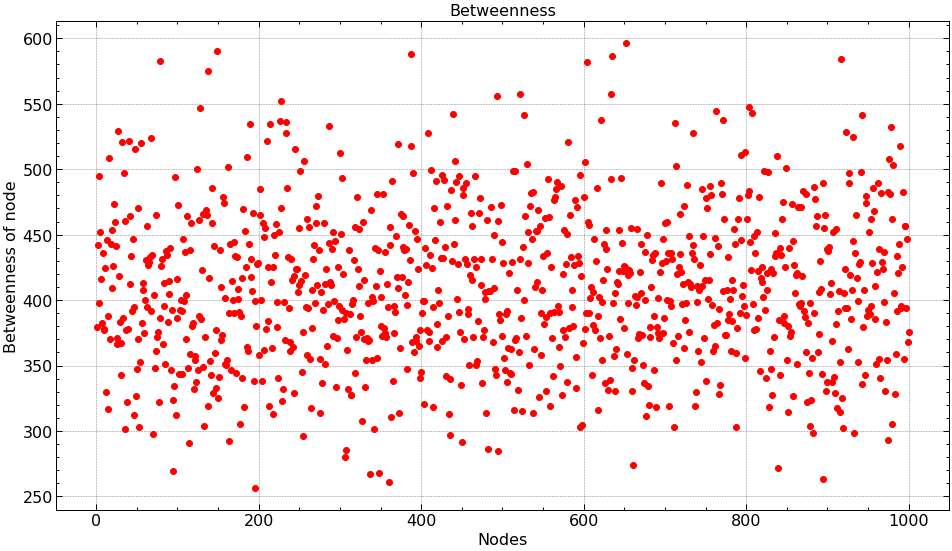

In [30]:
x = range(1,N+1)
y = bw

plt.figure(figsize=(16,9))
plt.plot(x, y, "ro") 
plt.grid(True)
plt.xlabel('Nodes')
plt.ylabel('Betweenness of node')
plt.title("Betweenness")
plt.yscale('linear')
plt.xscale('linear')
plt.savefig("Betweenness.png")
plt.show()

In [31]:
bwarr = np.array(bw)
print("The medium value of betweenness is: {}".format(np.mean(bwarr)))

The medium value of betweenness is: 409.0189999999998


### The clustering coefficient now

In [32]:
cc = g.transitivity_local_undirected()

x = cc.pop(0)
del x

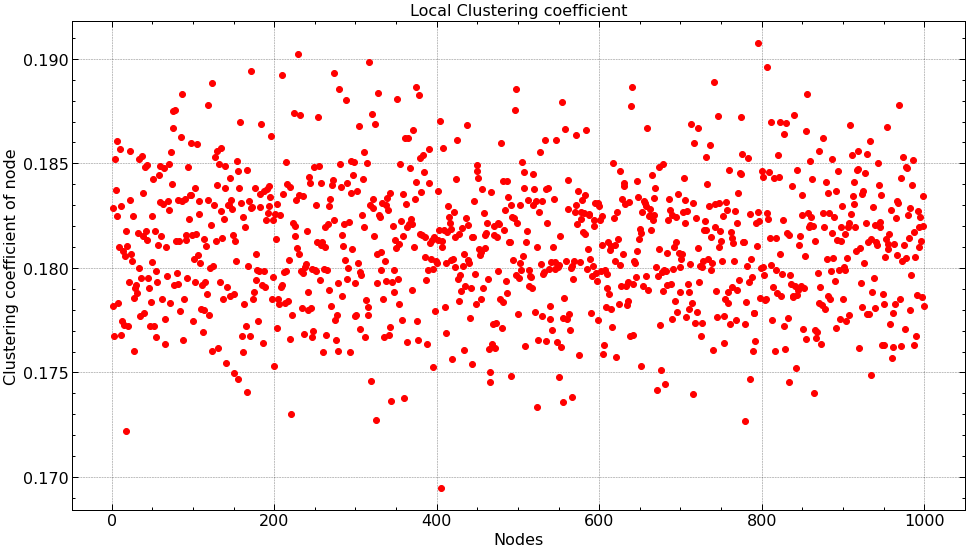

In [33]:
x = range(1,N+1)
y = cc

plt.figure(figsize=(16,9))
plt.plot(x, y, "ro") 
plt.grid(True)
plt.xlabel('Nodes')
plt.ylabel('Clustering coefficient of node')
plt.title("Local Clustering coefficient")
plt.yscale('linear')
plt.xscale('linear')
plt.savefig("Local_Clustering_Coefficient.png")
plt.show()

In [34]:
ccarr = np.array(cc)
print("The medium value of local clustering coefficient is: {}".format(np.mean(ccarr)))

The medium value of local clustering coefficient is: 0.18108884449995383


## Now we want to try model B

### Just the edge list will change, because it's generated in a different way, we can copy the rest of our precedent code with no differences

In [35]:
Klist = []

for i in range(M):
    n = random.random()
    if n <= p:
        Klist.append(Mlist[i])

In [36]:
def edges_to_adjacencylist(edges): # this piece of code converts the edgelist to an adjacency list
    dictx = {}
    for (x,y) in edges:
        if x not in dictx:
            dictx[x] = [y]
        elif y not in dictx[x]:
            dictx[x].append(y)
            
        if y not in dictx:
            dictx[y] = [x]
        elif x not in dictx[y]:
            dictx[y].append(x)
            
    return dictx
        

In [37]:
adjlist = edges_to_adjacencylist(Klist)

In [38]:
# here we add empty list for all nodes without connections
for i in range(N):
    if adjlist.get(i+1, -1) == (-1):
        adjlist[i+1] = []

In [39]:
assert len(adjlist) == N, "La lunghezza della lista adiacenza dovrebbe essere N!"

### Let's now calculate some theoretical quantities and their empyrical values.

In [40]:
kexp = p*(N-1)
kexpstd = (p*(1-p)*(N-1))**(1/2)
print("The average expected degree is: {}".format(kexp))
print("The standard deviation of the average expected degree is: {}".format(kexpstd))

The average expected degree is: 199.8
The standard deviation of the average expected degree is: 12.642784503423288


In [41]:
klist = []

for i in range(len(adjlist)):
    x = 0

    for j in range(len(adjlist[i+1])):
        x += 1
    klist.append(x)
    
karr = np.array(klist)

In [42]:
assert len(klist) == N, "La lunghezza della lista contenente tutti i degree dovrebbe essere N!"

In [43]:
k = np.mean(karr)
kstd = np.std(karr)
kmin = np.min(karr)
kmax = np.max(karr)
print("The average degree of our graph is: {}".format(k))
print("The standard deviation associated to the average degree is: {}".format(kstd))
print("The minimum degree is: {}".format(kmin))
print("The maximum degree is: {}".format(kmax))

The average degree of our graph is: 200.78
The standard deviation associated to the average degree is: 12.830884614865804
The minimum degree is: 162
The maximum degree is: 244


### Let's now plot the degree distribution

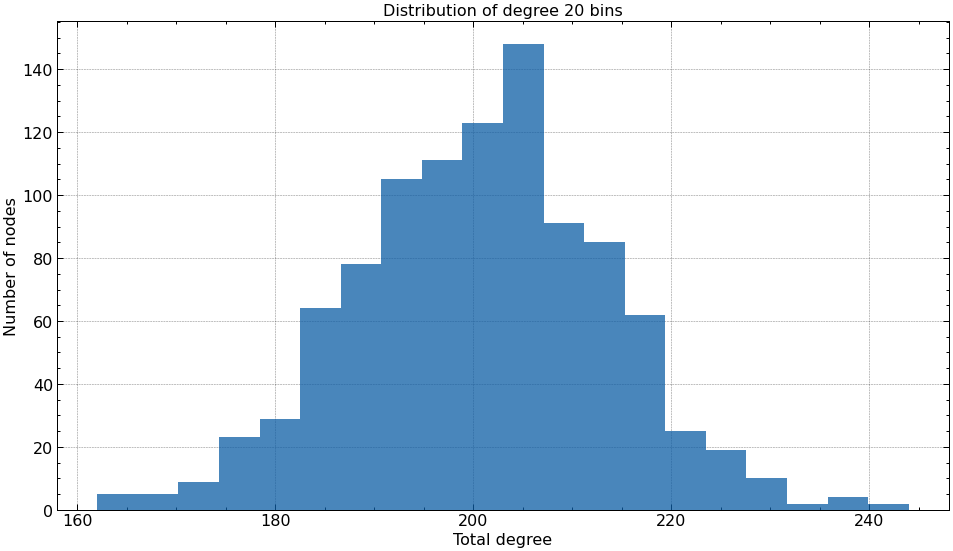

In [44]:
# Here I'll try to make a graph of the degree distribution
# We want the degree on the x, and the number of nodes with that degree on the y
# Or the histogram of the degree, we need x as the vector of the degree

x = karr
bins = 20
plt.figure(figsize=(16,9)) #must come BEFORE the actual plot
plt.hist(x, bins, alpha=0.75, density=False) #Alpha is the opacity, density is the normalization
plt.grid(True)
plt.locator_params(nbins=20) # this is about the density of thicks on both axis I could add <, axis='x'> inside the parentesis, to do just for one axis
plt.xlabel('Total degree')
plt.ylabel('Number of nodes')
plt.title('Distribution of degree ' + str(bins) + " bins")
plt.yscale('linear')
plt.xscale('linear')
plt.savefig('degree_distribution.png') #always save before plt.show() it should be "namefile.png" or "namefile.pdf"
plt.show()

In [45]:
x = karr
x.sort()
x = np.array(x)
y = np.arange(len(x)) / float(len(x))

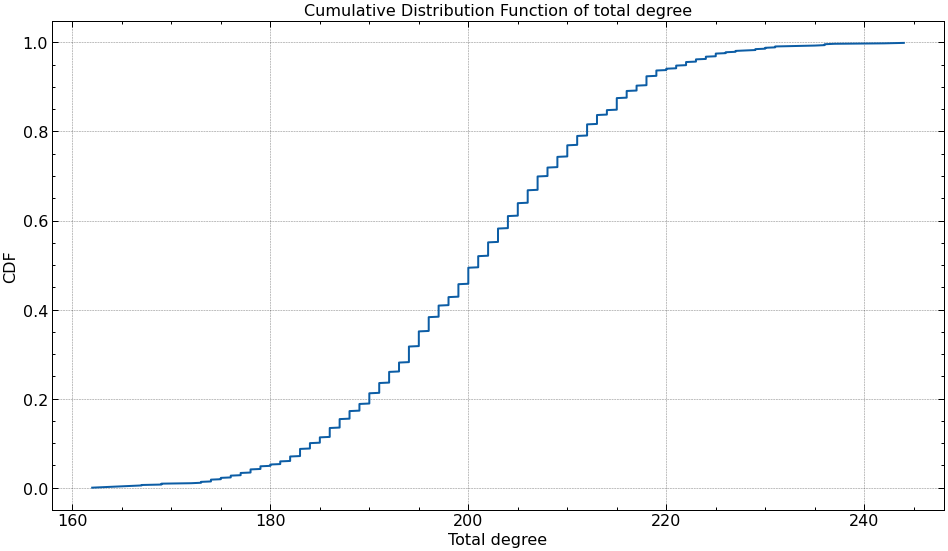

In [46]:
plt.figure(figsize=(16,9))
plt.plot(x, y) 
plt.grid(True)
plt.xlabel('Total degree')
plt.ylabel('CDF')
plt.title("Cumulative Distribution Function of total degree")
plt.yscale('linear')
plt.xscale('linear')
plt.savefig("CDF.png")
plt.show()

### Let's calculate the connected components

In [47]:
def bfs(graph, node): #function for BFS, graph is a dictionary of the adjacency list
    visited = [] # List for already visited nodes.
    queue = []         # Initialize a queue, this contains the nodes whose neighbours are yet to be visited
    connections = [] # This list, at the end, will contain all the nodes connected to the selected node
    
    visited.append(node)
    queue.append(node)

    while len(queue)>0:                    # Creating loop to visit each node
        m = queue.pop(0) 
        connections.append(m)

        for neighbour in graph[m]:
            if neighbour not in visited:
                visited.append(neighbour)
                queue.append(neighbour)
    
    return connections

In [48]:
connected1 = []
alreadyconnected = set()
connectedtemp = set()

for i in range(1,N+1): #TROVARE LE COMPONENTI CONNESSE
    
    if i in alreadyconnected:
        continue
    
    connectedtemp = set()
    connectedtemp.add(i)

    for j in bfs(adjlist,i):
        connectedtemp.add(j)
        alreadyconnected.add(j)
        
    connected1.append(connectedtemp)
# fare un fit della coda della distribuzione e vedere se si adatta meglio ad un esponenziale, ad una gaussiana o ad un POW (powerlow)

In [49]:
print("Our graph has {} connected components".format(len(connected1)))

Our graph has 1 connected components


### Let's calculate assortativity manually

In [50]:
degreedict0 = {}

for key in adjlist:
    val = adjlist[key]
    degreedict0[key] = len(val)

In [51]:
degreedict1 = {}
default = -1
for key in adjlist:
    val = adjlist[key]
    degree = len(val)
    if degreedict1.get(degree,default) == -1: #if the key entry is not there, we set it
        degreedict1[degree] = [key]
    else:
        degreedict1[degree].append(key) #if the key entry is present, we append another airport

In [52]:
assortativity = {}


for key in degreedict1:
    val = degreedict1[key]
    Nk = len(val)
    sum1 = 0
    for airport in val:
        knn = 0
        for neigh in adjlist[airport]:         
            knn += degreedict0[neigh]
        knn /= degreedict0[airport]
        sum1 += knn
    assortativity[key] = sum1/Nk


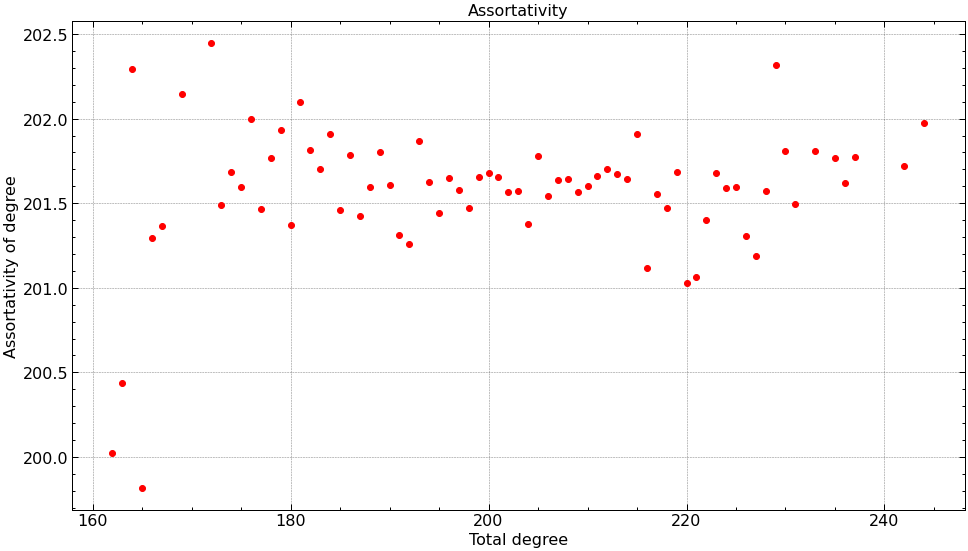

In [53]:
x = []
for key in assortativity:
    x.append(int(key))
x.sort()

y = []
for i in x:
    y.append(assortativity[i])

plt.figure(figsize=(16,9))
plt.plot(x, y, "ro") 
plt.grid(True)
plt.xlabel('Total degree')
plt.ylabel('Assortativity of degree')
plt.title("Assortativity")
plt.yscale('linear')
plt.xscale('linear')
plt.savefig("assortativity.png")
plt.show()

### Let's calculate the betweenness and other things with igraph

In [54]:
g = ig.Graph(N, Klist)
g["title"] = "ER"
g.vs["name"] = range(1,N+1)

In [55]:
bw = g.betweenness()
x = bw.pop(0)
del x

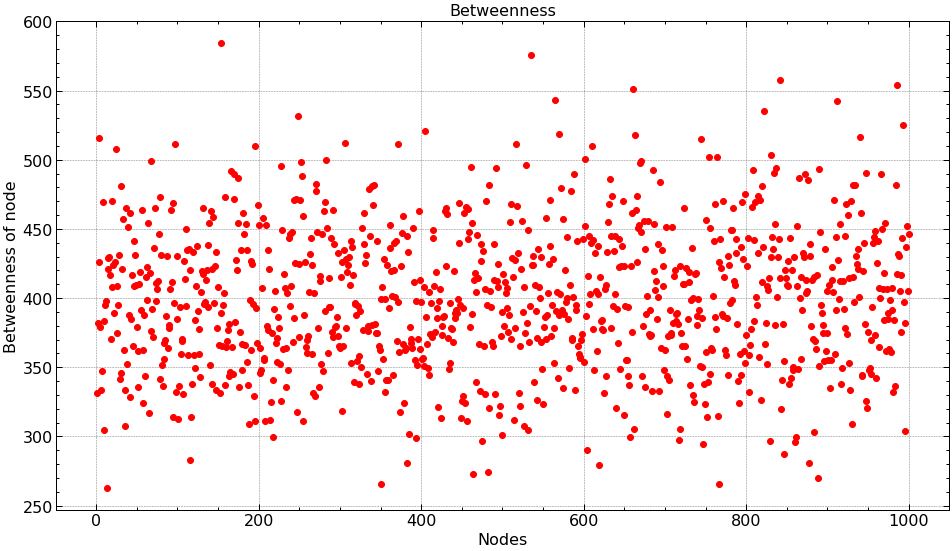

In [56]:
x = range(1,N+1)
y = bw

plt.figure(figsize=(16,9))
plt.plot(x, y, "ro") 
plt.grid(True)
plt.xlabel('Nodes')
plt.ylabel('Betweenness of node')
plt.title("Betweenness")
plt.yscale('linear')
plt.xscale('linear')
plt.savefig("Betweenness.png")
plt.show()

In [57]:
bwarr = np.array(bw)
print("The medium value of betweenness is: {}".format(np.mean(bwarr)))

The medium value of betweenness is: 399.10999999999984


### The clustering coefficient now

In [58]:
cc = g.transitivity_local_undirected()

x = cc.pop(0)
del x

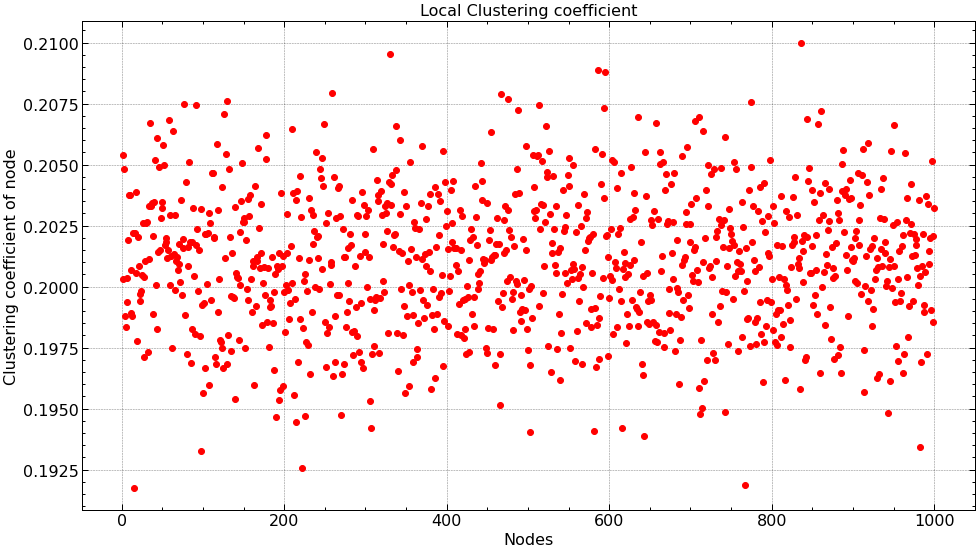

In [59]:
x = range(1,N+1)
y = cc

plt.figure(figsize=(16,9))
plt.plot(x, y, "ro") 
plt.grid(True)
plt.xlabel('Nodes')
plt.ylabel('Clustering coefficient of node')
plt.title("Local Clustering coefficient")
plt.yscale('linear')
plt.xscale('linear')
plt.savefig("Local_Clustering_Coefficient.png")
plt.show()

In [60]:
ccarr = np.array(cc)
print("The medium value of local clustering coefficient is: {}".format(np.mean(ccarr)))

The medium value of local clustering coefficient is: 0.20102954262912284
